# <center><font color=lightBlue>Iterations and Iterables</font></center>

***
## <center><font color=tomato>Comprehensions</font></center>

-   Concise syntax for describing lists, sets, and dictionaries
-   Readable and expressive
-   Close to natural reading

## `[expression(item) for item in iterable]`

For each `item` in the `iterable` on the right, we evaluate the `expression` on the left,
and use that as the next element of the list being constructed


### <font color=lightGreen>List Comprehensions</font>

In [60]:
words = 'Why sometimes I have believed as many as six impossible things before breakfast'.split()
words

['Why',
 'sometimes',
 'I',
 'have',
 'believed',
 'as',
 'many',
 'as',
 'six',
 'impossible',
 'things',
 'before',
 'breakfast']

In [61]:
"""With comprehensions"""
[len(word) for word in words]

[3, 9, 1, 4, 8, 2, 4, 2, 3, 10, 6, 6, 9]

In [62]:
"""Equivalent Syntax"""
lengths = []
for word in words:
    lengths.append(len(word))
lengths

[3, 9, 1, 4, 8, 2, 4, 2, 3, 10, 6, 6, 9]

In [63]:
from math import factorial
f = [len(str(factorial(x))) for x in range(20)]
type(f), f

(list, [1, 1, 1, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18])

### <font color=lightGreen>Set Comprehensions</font>

In [64]:
f = {len(str(factorial(x))) for x in range(20)}
type(f), f

(set, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18})

### <font color=lightGreen>Dict Comprehensions</font>

<font size=5>

```
{
  key_expr(item): value_expr(item)
  for item in iterable
}
```
</font>

-  Dictionary comprehensions do not work on `dict` sources.
-  Then we need to wse `dict.items()` to get keys and values from `dict` sources


In [4]:
country_to_capital = {'United Kingdom': 'London',
                      'Brazil': 'Brasilia',
                      'Morocco': 'Rabat',
                      'Sweden': 'Stockholm'}
country_to_capital

{'United Kingdom': 'London',
 'Brazil': 'Brasilia',
 'Morocco': 'Rabat',
 'Sweden': 'Stockholm'}

In [66]:
country_to_capital.items()

dict_items([('United Kingdom', 'London'), ('Brazil', 'Brasilia'), ('Morocco', 'Rabat'), ('Sweden', 'Stockholm')])

In [67]:
{capital: country for country, capital in country_to_capital.items()}

{'London': 'United Kingdom',
 'Brasilia': 'Brazil',
 'Rabat': 'Morocco',
 'Stockholm': 'Sweden'}

If the operation produce identical keys, later keys will overwrite earlier keys



In [68]:
words = ["hi", "hello", "foxtrot", "hotel"]
{ x[0]: x for x in words }

{'h': 'hotel', 'f': 'foxtrot'}

Try to avoid tu much complexity, the following example is a kind of limit:


In [69]:
import os, glob
{os.path.realpath(p): os.stat(p).st_size for p in glob.glob('*.py')}


{'/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/files.py': 104,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/exceptional.py': 1970,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/fractal.py': 944,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/series.py': 324,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/classExamples.py': 2000,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/rootsWithError.py': 477,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/airtravel.py': 5984,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/generator.py': 809,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/bmp.py': 3835,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/rootsHandlingException.py': 688,
 '/Users/jalejo/PycharmProjects/courses/corePython_gettingStarted/files1.py': 115,
 '/Users/jalejo/PycharmProjects/courses/core

***
### <font color=lightGreen>Filtering Comprehensions</font>


In [70]:
from math import sqrt

def is_prime(x):
    if x < 2:
        return False
    for i in range(2,int(sqrt(x))+1):
        if x % i == 0:
            return False
    return True
[x for x in range(101) if is_prime(x)]

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [71]:

{x*x: (1, x, x*x) for x in range(20) if is_prime(x)}

{4: (1, 2, 4),
 9: (1, 3, 9),
 25: (1, 5, 25),
 49: (1, 7, 49),
 121: (1, 11, 121),
 169: (1, 13, 169),
 289: (1, 17, 289),
 361: (1, 19, 361)}

***
## <center><font color=tomato>Iteration Protocols</font></center>

### <font color=lightGreen>iterable</font>

Can be passed to `iter()` to product an iterator

### <font color=lightGreen>iterator</font>

Can be passed to `next()` to get the next value in the sequence


In [72]:
iterable = ['Spring', 'Summer', 'Autumn', 'Winter']
iterator = iter(iterable)
next(iterator)

'Spring'

In [73]:
next(iterator)


'Summer'

In [74]:
next(iterator)

'Autumn'

In [75]:
next(iterator)

'Winter'

after last iteration it throws an exception

In [76]:
try:
    next(iterator)
except Exception as e:
    print(e.__repr__())

StopIteration()


***
## <center><font color=tomato>Stopping Iteration with Exception</font></center>



In [77]:
def first(iterable):
    iterator = iter(iterable)
    try:
         return next(iterator)
    except StopIteration:
        raise ValueError("iterable is empty")

In [78]:
first(["1st", "2nd", "3rd "])

'1st'

In [79]:
first({"1st", "2nd", "3rd "})

'1st'

In [80]:
try:
    first(set())
except Exception as e:
    print(e.__repr__())


ValueError('iterable is empty')


***
## <center><font color=tomato>Generator Functions</font></center>

-   Iterables defined by functions
-   Lazy evaluation
-   Can model sequences with no definite end
-   Composable into pipelines

## <center>`yield`</center>

-   Generator functions must include at least one `yield` statement
-   May also include `return` statement with no argument

In [81]:
def gen123():
    yield 1
    yield 2
    yield 3

g = gen123()
g

<generator object gen123 at 0x7fe06a4729e0>

In [82]:
next(g)

1

In [83]:
next(g)

2

In [84]:
next(g)

3

In [85]:
try:
    next(g)
except Exception as e:
    print(e.__repr__())



StopIteration()


In [86]:
for v in gen123():
    print(v)

1
2
3


In [87]:
h = gen123()
i = gen123()
h

<generator object gen123 at 0x7fe069e0d660>

In [88]:
i


<generator object gen123 at 0x7fe069e0d0b0>

In [89]:
h is i

False

In [90]:
next(h)

1

In [91]:
next(h)

2

In [92]:
next(i)

1

In [93]:
def gen246():
    print("About to yield 2")
    yield 2
    print("About to yield 4")
    yield 4
    print("About to yield 6")
    yield 6
    print("About to return")

In [94]:
g = gen246()
next(g)

About to yield 2


2

In [95]:
next(g)

About to yield 4


4

In [96]:
next(g)

About to yield 6


6

In [97]:
try:
    next(g)
except StopIteration as exc:
    print("StopIteration exception")

About to return
StopIteration exception


### <font color=lightGreen>Maintaining State in Generators</font>
## `continue`

Finish current loop iteration and begin the next iteration immediately

In [6]:
def take(count, iterable):
    counter = 0
    for item in iterable:
        if counter == count:
            return
        counter += 1
        yield item


def distinct(iterable):
    seen = set()
    for item in iterable:
        if item in seen:
            continue
        yield item
        seen.add(item)


def run_pipeline():
    items = [3, 6, 6, 2, 1, 1]
    for item in take(3, distinct(items)):
        print(item)

run_pipeline()

3
6
2


## <center><font color=tomato>Laziness and the Infinite</font></center>

-   Generators only do enough work to produce requested data.
-   This allows generators to model infinite (or just very large) sequences
-   Examples of such sequences are:
    -   Sensor readings
    -   Mathematical sequences
    -   Contents of large files

Uncomment and debug the following code to understand the dynamic of the process

This is an infinite loop ^C would terminate the process

### <font color=lightGreen>Generator Expression</font>


In [99]:
million_squares = (x*x for x in range(1,1000001))
million_squares

<generator object <genexpr> at 0x7fe06a47e900>

In [100]:
list(million_squares)[-10:]

[999982000081,
 999984000064,
 999986000049,
 999988000036,
 999990000025,
 999992000016,
 999994000009,
 999996000004,
 999998000001,
 1000000000000]

generators are single use objects, repeating the instruction will result in an empty list


In [101]:
list(million_squares)[-10:]

[]

Optional parentheses

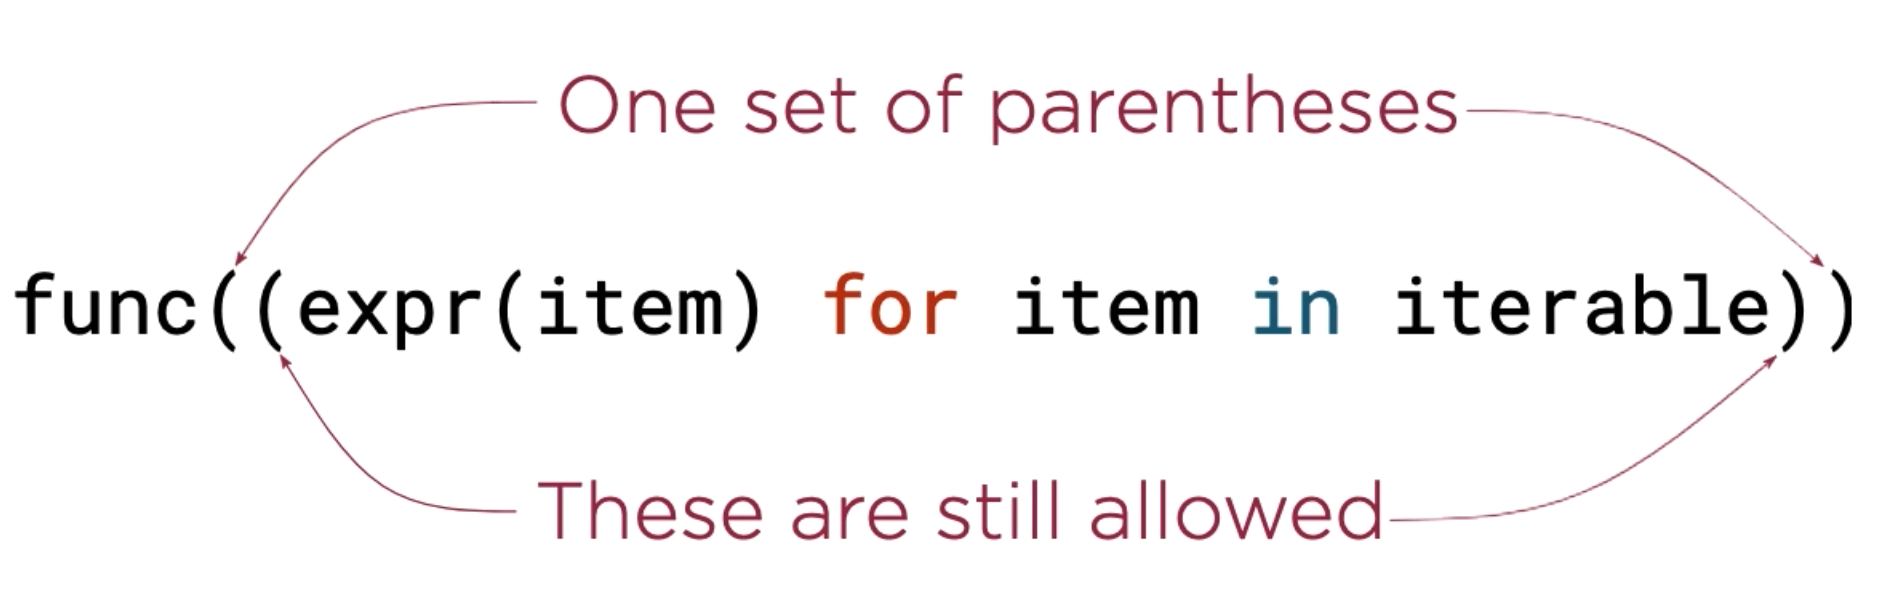

In [102]:
from IPython.core.display import Image, display
display(Image('img/image11.png'))

In [103]:
sum(x*x for x in range(1,10000001))

333333383333335000000

In [104]:
sum(x for x in range(1,1001) if is_prime(x))

76127

### <font color=lightGreen>Iteration tools</font>

- Python provides a powerful vocabulary for working with iterators
- These include the familiar `enumerate()` and `sum()`
- The `itertools` module provides many more

## <center>`itertools.islice`</center>

Perform lazy slicing of any iterator
```
from lazy itertools import islice
islice(all_primes, 1000)```

## <center>`itertools.count`</center>

An unbounded arithmetic sequences of integers


In [105]:
from itertools import count, islice

thousand_primes = islice((x for x in count() if is_prime(x)), 1000)
thousand_primes
list(thousand_primes)[-10:]

[7841, 7853, 7867, 7873, 7877, 7879, 7883, 7901, 7907, 7919]

In [106]:
sum(islice((x for x in count() if is_prime(x)),1000))


3682913

### <font color=lightGreen>Boolean aggregation</font>

## <center>`any()`</center>

Determines if any elements in a series are true


In [107]:
any([False, False, True]), any([False, False, False])

(True, False)

In [108]:
any(is_prime(x) for x in range(1328, 1361))


False

## <center>`all()`</center>

Determine if all elements in a series are true


In [109]:
all([False, False, True]), all([True, True])

(False, True)

In [110]:
all(name == name.title() for name in ["London", "Paris", "Tokyo", "Sydney", "Kuala Lumpur"])

True

In [111]:
all(name == name.title() for name in ["london", "Paris", "Tokyo", "Sydney", "Kuala Lumpur"])

False

## <center>`zip()`</center>

Syncronize iterations across two or more iterable


In [7]:
sunday = [12, 13, 14, 15, 23, 45, 45, 45, 24]
monday = [23, 45, 23, 24, 57, 24, 34, 34, 10]
for item in zip(sunday, monday):
    print(item)

(12, 23)
(13, 45)
(14, 23)
(15, 24)
(23, 57)
(45, 24)
(45, 34)
(45, 34)
(24, 10)


In [8]:
for sun, mon in zip(sunday, monday):
    print("average =", (sun + mon)/2)

average = 17.5
average = 29.0
average = 18.5
average = 19.5
average = 40.0
average = 34.5
average = 39.5
average = 39.5
average = 17.0


In [9]:
tuesday = [12, 8, 45, 78, 32, 15, 35, 65, 7]

In [13]:
for temps in zip(sunday, monday, tuesday):
    print(f"min = {min(temps):4.1f}, max = {max(temps):4.1f}, average = {sum(temps)/len(temps):4.1f}")

min = 12.0, max = 23.0, average = 15.7
min =  8.0, max = 45.0, average = 22.0
min = 14.0, max = 45.0, average = 27.3
min = 15.0, max = 78.0, average = 39.0
min = 23.0, max = 57.0, average = 37.3
min = 15.0, max = 45.0, average = 28.0
min = 34.0, max = 45.0, average = 38.0
min = 34.0, max = 65.0, average = 48.0
min =  7.0, max = 24.0, average = 13.7


## <center>`chain()`</center>

In [14]:
from itertools import chain
temperatures = chain(sunday, monday, tuesday)
list(temperatures)

[12,
 13,
 14,
 15,
 23,
 45,
 45,
 45,
 24,
 23,
 45,
 23,
 24,
 57,
 24,
 34,
 34,
 10,
 12,
 8,
 45,
 78,
 32,
 15,
 35,
 65,
 7]

In [15]:
all(t > 0 for t in temperatures)

True

In [16]:
list(temperatures)

[]